In [55]:
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

from keras.utils import to_categorical           # Library for One Hot Encoding
import keras.preprocessing.image as img


In [2]:
# !pwd

In [3]:
# Import Dataset
file_path = os.path.join("../Resources","fashion_mnist_test.csv")
df_testing=pd.read_csv(file_path)

In [4]:
df_testing.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Import Dataset
file_path = os.path.join("../Resources","fashion-mnist_train.csv")
df_training=pd.read_csv(file_path)

In [6]:
df_training.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
training_images = np.array(df_training.iloc[0:,1:])
training_images = training_images.reshape(len(training_images), 28,28) 
training_images = training_images.astype('float32')
training_labels = np.array(df_training.iloc[:,0])
training_labels = to_categorical(training_labels) 

In [8]:
testing_images = np.array(df_testing.iloc[0:,1:])
testing_images = testing_images.reshape(len(testing_images), 28,28)
testing_images = testing_images.astype('float32')
testing_labels = df_testing.iloc[:,0]

test_for_pred = testing_images  

In [9]:
test_labels_for_pred = testing_labels
testing_labels = to_categorical(testing_labels)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
training_images.shape

(60000, 28, 28)

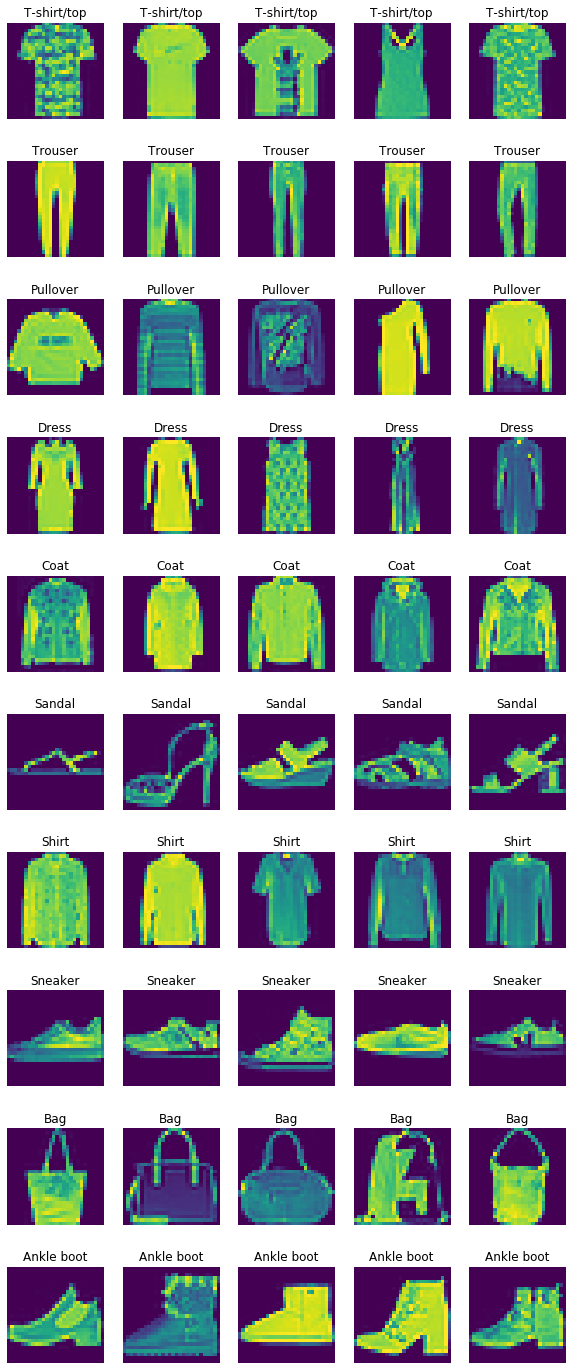

In [12]:
fig, ax = plt.subplots(10,5, figsize = (10,25))
for i,c_name in enumerate(class_names):
    temp = df_training[df_training.iloc[:,0] == i].head(5)
    for k in range(5):
        ax[i,k].imshow(np.array(temp.iloc[k,1:]).reshape(28,28))
        ax[i,k].axis('off')
        ax[i,k].grid(False)
        ax[i,k].title.set_text(str(c_name)) 

In [13]:
# plt.imshow(df_training[0], cmap=plt.cm.Greys)
# np.set_printoptions(linewidth = 200)
# fig, ax = plt.subplots(1,2, figsize = (20,8))
# ax[0].imshow(training_images[1], aspect = 'auto')
# ax[1].imshow(pixel_img,aspect = 'auto')



In [14]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [15]:
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [16]:
# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(zoom_range=0.1,
                                      shear_range = 0.1,
                                      rotation_range = 0.1,
                                      horizontal_flip=True,
                                      fill_mode = 'nearest')

training_datagen.fit(training_images)

In [17]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu', padding= 'same', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.20),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu', padding= 'same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10 , activation = 'softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [18]:
history = model.fit(training_datagen.flow(training_images, training_labels), verbose = 1, epochs = 60, batch_size = 50, steps_per_epoch= len(training_images)/ 50, validation_data= (testing_images, testing_labels))

Epoch 1/60
1200/1200 [==============================] - 52s 42ms/step - loss: 0.7648 - accuracy: 0.7191 - val_loss: 0.3834 - val_accuracy: 0.8565
Epoch 2/60
1200/1200 [==============================] - 38s 31ms/step - loss: 0.4192 - accuracy: 0.8455 - val_loss: 0.2951 - val_accuracy: 0.8940
Epoch 3/60
1200/1200 [==============================] - 38s 31ms/step - loss: 0.3561 - accuracy: 0.8693 - val_loss: 0.2625 - val_accuracy: 0.9028
Epoch 4/60
1200/1200 [==============================] - 38s 32ms/step - loss: 0.3260 - accuracy: 0.8796 - val_loss: 0.2504 - val_accuracy: 0.9086
Epoch 5/60
1200/1200 [==============================] - 37s 31ms/step - loss: 0.3112 - accuracy: 0.8865 - val_loss: 0.2448 - val_accuracy: 0.9093
Epoch 6/60
1200/1200 [==============================] - 38s 31ms/step - loss: 0.2851 - accuracy: 0.8946 - val_loss: 0.2410 - val_accuracy: 0.9114
Epoch 7/60
1200/1200 [==============================] - 37s 31ms/step - loss: 0.2727 - accuracy: 0.8968 - val_loss: 0.2302 -

In [19]:
# Model Evaluation

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

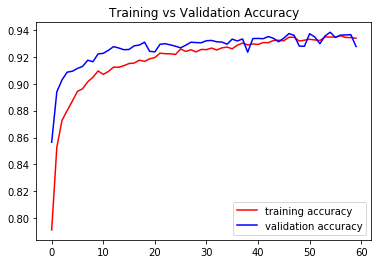

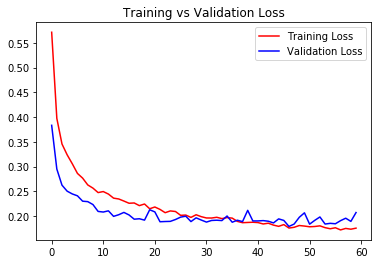

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(60)

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs , val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [60]:
history.history


{'loss': [0.5714120268821716,
  0.39743515849113464,
  0.3456825911998749,
  0.3238661587238312,
  0.3056963384151459,
  0.2862209975719452,
  0.2767725884914398,
  0.2629704177379608,
  0.25658169388771057,
  0.2475508600473404,
  0.2496117353439331,
  0.2445545494556427,
  0.23631879687309265,
  0.2346431165933609,
  0.2304520606994629,
  0.22600151598453522,
  0.22657102346420288,
  0.2212154120206833,
  0.22448265552520752,
  0.21487070620059967,
  0.21844172477722168,
  0.21356895565986633,
  0.2069397121667862,
  0.21050354838371277,
  0.2093323916196823,
  0.20160120725631714,
  0.2021256387233734,
  0.19744400680065155,
  0.2027655392885208,
  0.19889436662197113,
  0.19628256559371948,
  0.19615943729877472,
  0.19766353070735931,
  0.19498468935489655,
  0.1970503181219101,
  0.19597786664962769,
  0.1893688142299652,
  0.1867237240076065,
  0.18721643090248108,
  0.1876399964094162,
  0.18695376813411713,
  0.18416732549667358,
  0.18568529188632965,
  0.18182635307312012,
 

In [61]:
# df = pd.DataFrame(list(history.history.items()),orient = "columns", columns = ['loss','accuracy'])
history_history_df = pd.DataFrame.from_dict(history.history)

In [62]:
history_history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.571412,0.791302,0.383433,0.8565
1,0.397435,0.852734,0.295061,0.8940
2,0.345683,0.872708,0.262541,0.9028
3,0.323866,0.880052,0.250404,0.9086
4,0.305696,0.887057,0.244791,0.9093


In [63]:
history_history_df.to_csv("history_history_df.csv", index=False)

In [67]:
test_for_pred = np.expand_dims(test_for_pred, axis = 3)
test_predictions = model.predict_classes(test_for_pred)

from sklearn.metrics import classification_report
print(classification_report(test_labels_for_pred, test_predictions, target_names = class_names))

C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: in user code:

    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:425 call
        inputs, training=training, mask=mask)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer max_pooling2d is incompatible with the layer: expected ndim=4, found ndim=9. Full shape received: (None, 28, 28, 1, 1, 1, 1, 1, 32)


In [68]:
pic_names = os.listdir('images/DavidImages')   
print(pic_names[0:2])

['bag1.jpg', 'bag2.jpg']


IndexError: index 6 is out of bounds for axis 1 with size 6

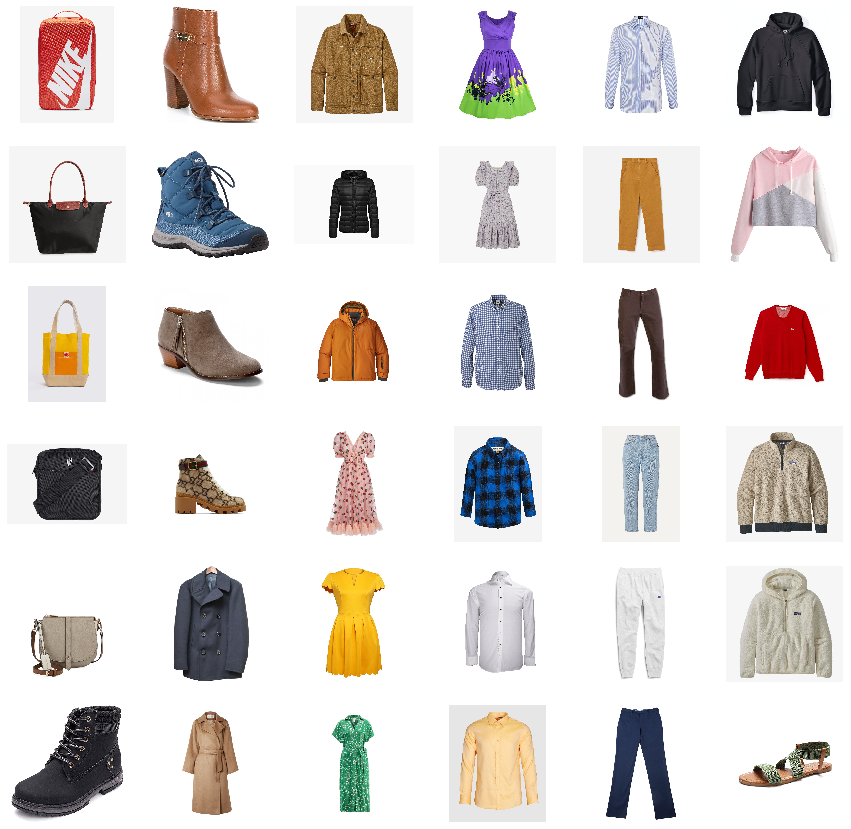

In [69]:
# Loading the Real Pictures
real_images = []
fig, ax = plt.subplots(6,6, figsize = (15,15))
i = 0
k = 0
for f in pic_names:
    path = 'images/DavidImages/'
    image = img.load_img(path + f)     
    if i>5:
        k+=1
        i=0
    ax[i,k].imshow(image)
    ax[i,k].grid(False)
    ax[i,k].axis('off')
    i+=1

In [70]:
# Real pictures Prediction

import keras.preprocessing.image as img
images = []
for f in pic_names:
    path = 'images/DavidImages/'
    image = img.load_img(path + f, grayscale=True, target_size=(28,28))      # Convert into grayscle and 28x28
    x = img.img_to_array(image)
    images.append(x.reshape(28,28))

C:\Users\tobia\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


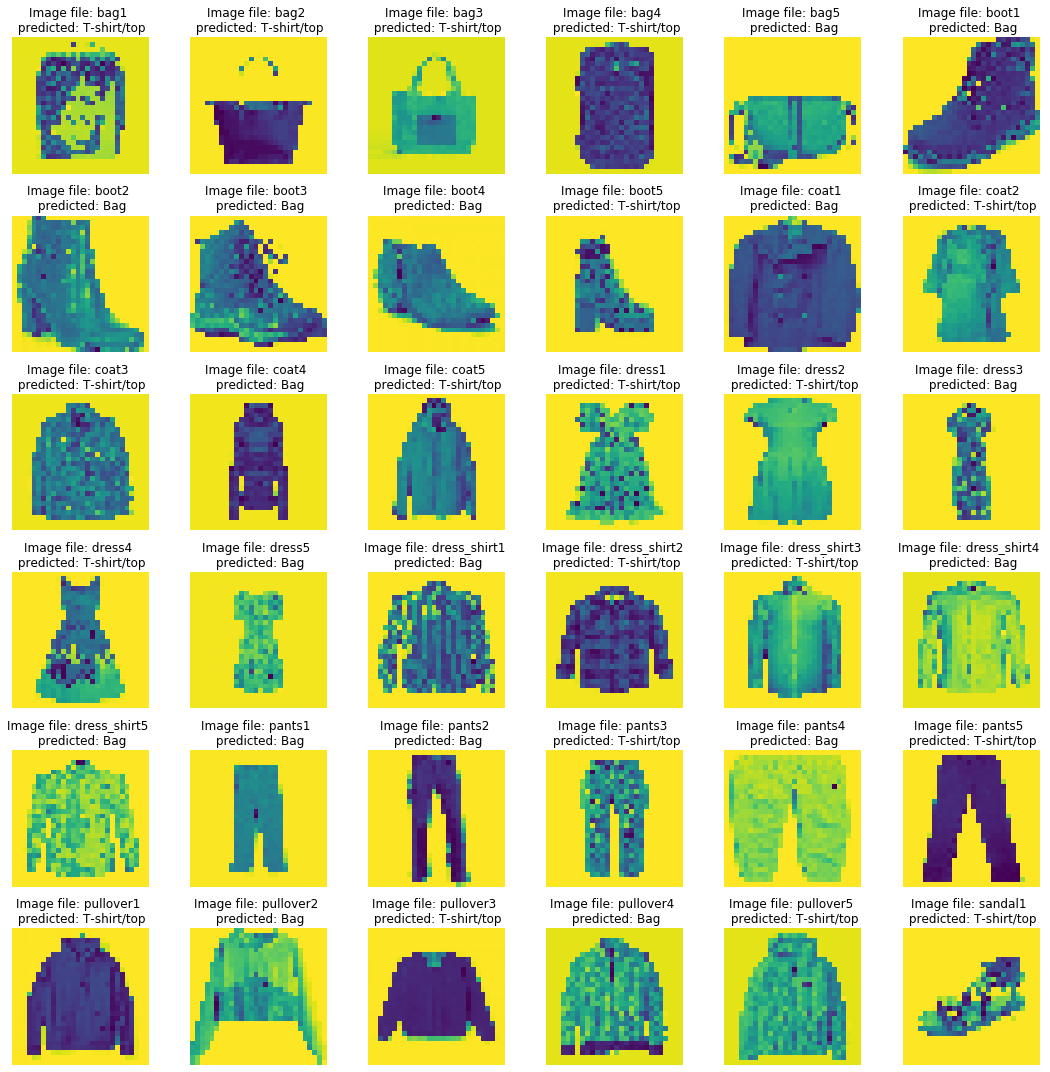

In [71]:
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images = model.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0

for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    #ax[i,k].add_subplot(gs[i,k])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images[pic])]}')
    pic +=1 
plt.tight_layout()
plt.show()

In [72]:
# obj_images[0]

In [73]:
true_pred = 0
for i,img in enumerate(predicted_images):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images))*100,2)} of the real pictures are predicted correctly.')

2.0 of the real pictures are predicted correctly.


In [74]:
#The real pictures' background is converted to 0.
for pic in range(len(images)):
  for i in range(28):
    for k in range(28):
      if images[pic][i][k] >= 235:
        images[pic][i][k] = 0
      else:
        images[pic][i][k] =images[pic][i][k]

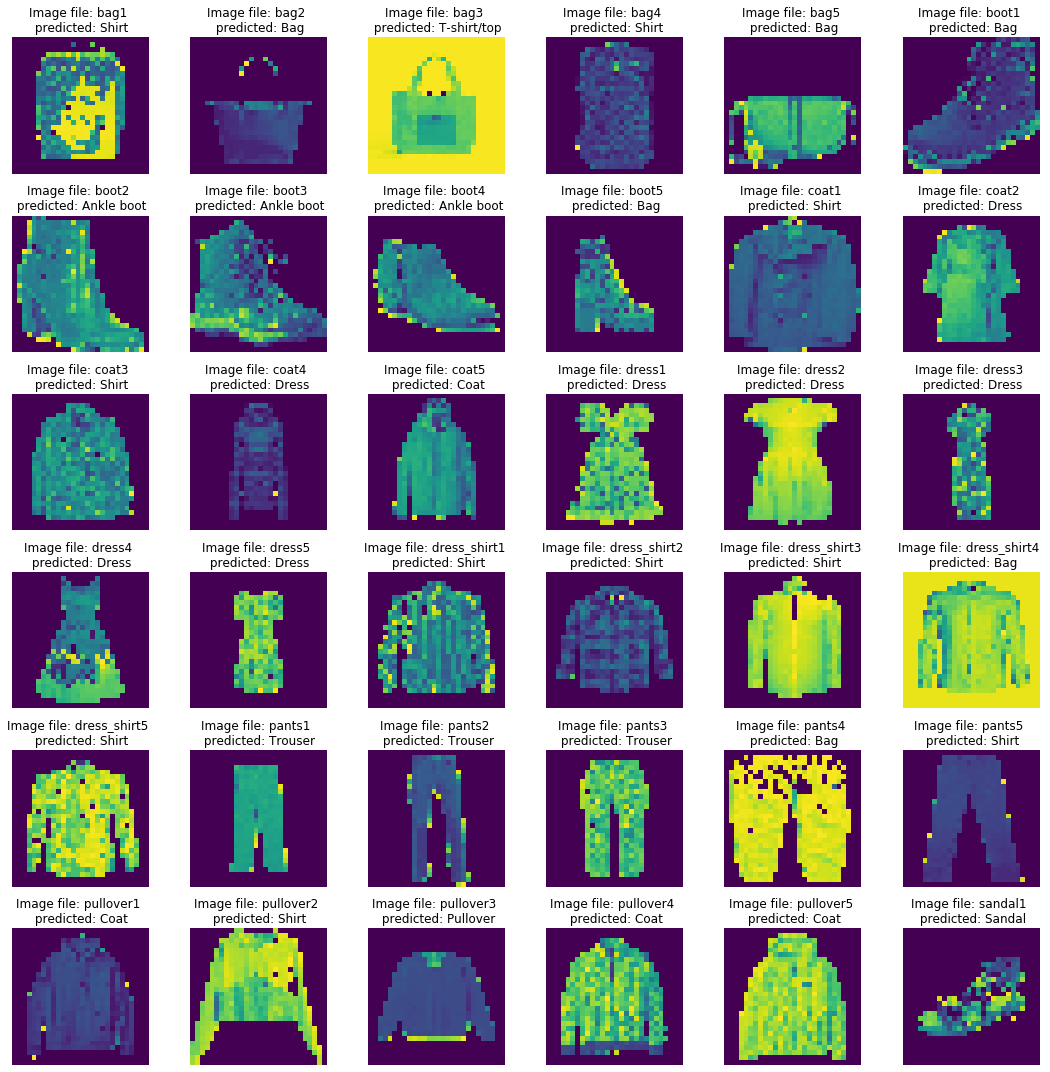

In [75]:
import matplotlib.gridspec as gridspec
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images1 = model.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0
for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images1[pic])]}')
    pic +=1 
plt.tight_layout()
plt.show()

In [76]:
# Correct prediction rate
true_pred = 0
for i,img in enumerate(predicted_images1):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images1))*100,2)} of the real pictures are predicted correctly.')
    

30.0 of the real pictures are predicted correctly.


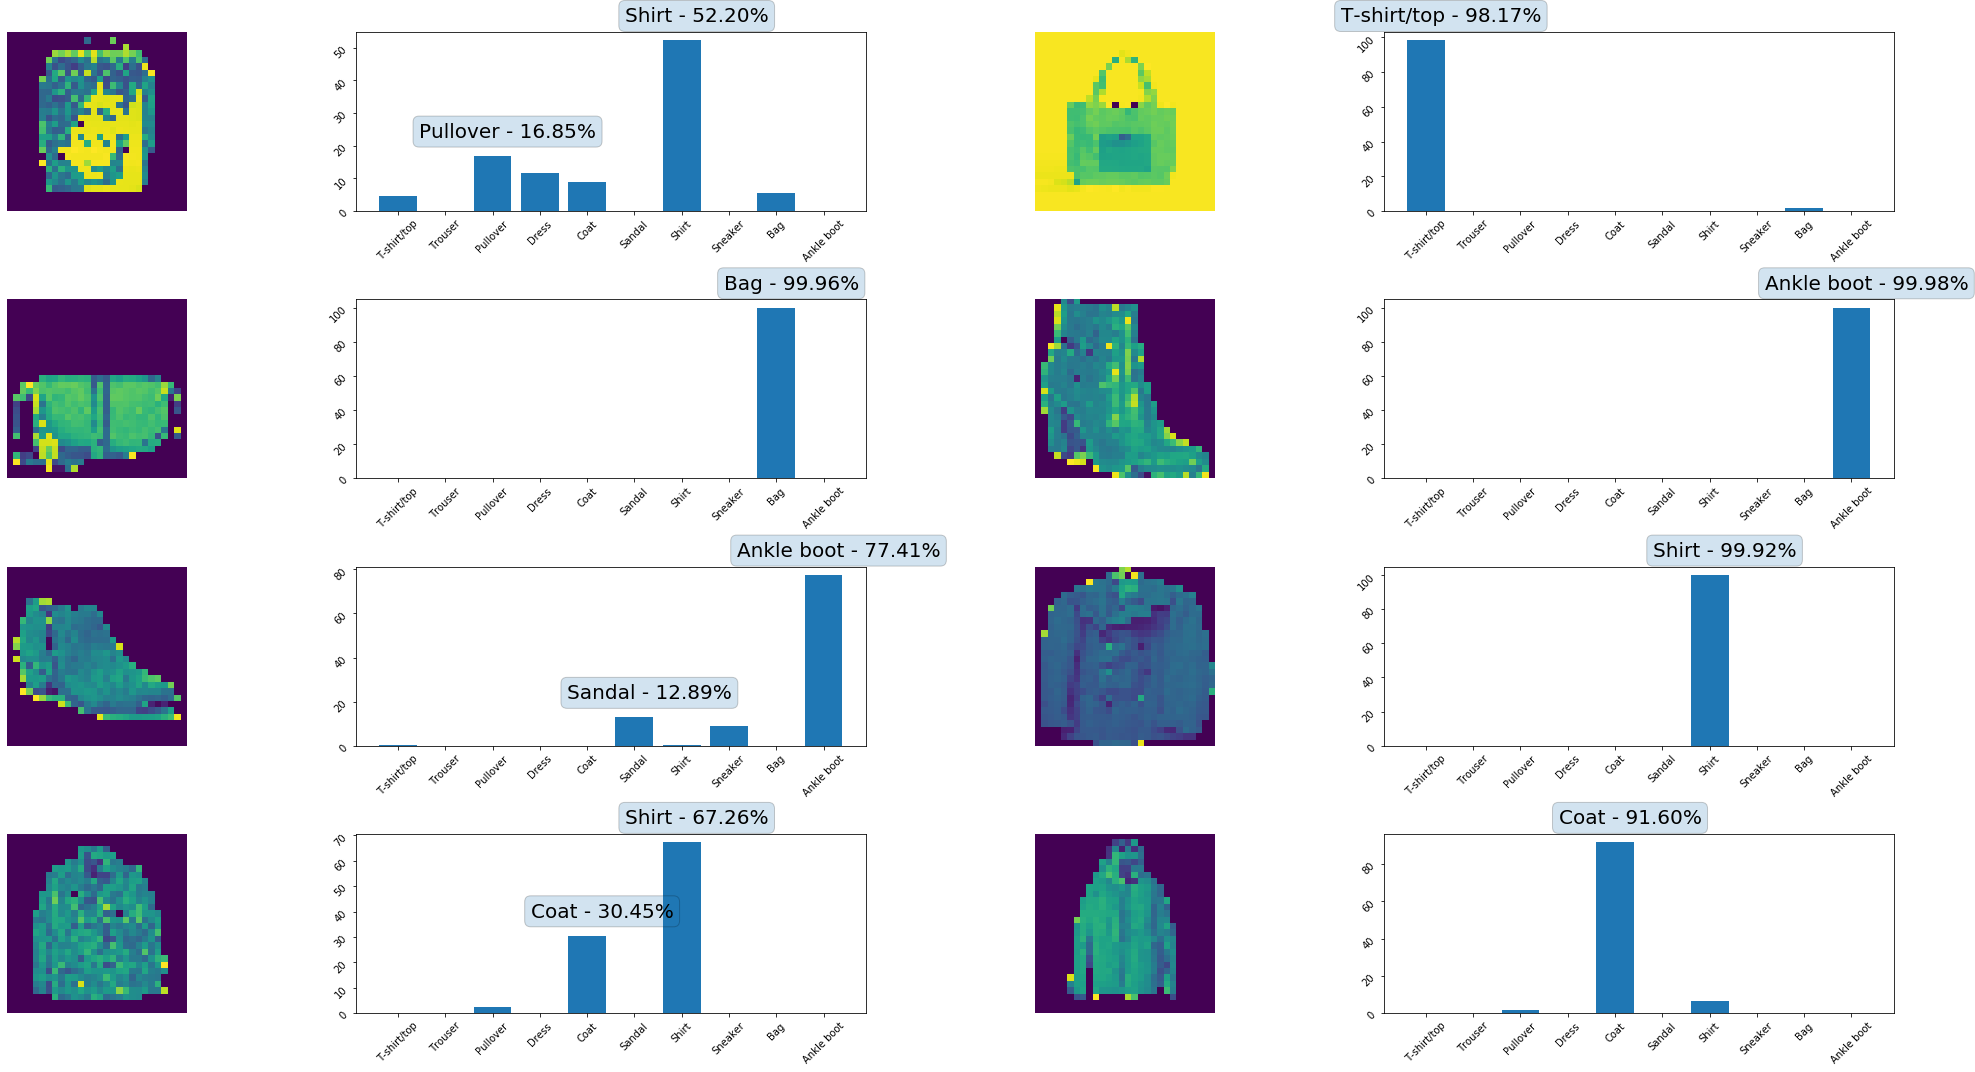

In [77]:
pic = 0
fig, ax = plt.subplots(4,4, figsize =(30,15))
for i in range(4):
  for k in range(4):
    if k % 2 == 0:
      ax[i,k].imshow(images[pic])
      ax[i,k].axis('off')
      ax[i,k].grid(False)
    elif k % 2 == 1:
      ax[i,k].bar(class_names, predicted_images1[pic-1]* 100 )
      ax[i,k].tick_params(rotation =45)
      for a,p in enumerate(ax[i,k].patches):
        if p.get_height() > 12:
            
            ax[i,k].annotate(f"{class_names[a]} - "+format( p.get_height(),'.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), bbox=dict(boxstyle="round", alpha=0.2),size = 20, ha = 'center', va = 'bottom', xytext = (15,15), textcoords = 'offset points')
    pic +=1
    
plt.tight_layout()

In [ ]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu', padding= 'same', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.20),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu', padding= 'same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(10 , activation = 'softmax')])

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model2.fit(training_images, training_labels, verbose = 1, epochs = 60, batch_size = 50, steps_per_epoch= len(training_images)/ 50, validation_data= (testing_images, testing_labels))


Epoch 1/60
1200/1200 [==============================] - 70s 58ms/step - loss: 0.6807 - accuracy: 0.7455 - val_loss: 0.3279 - val_accuracy: 0.8813
Epoch 2/60
1200/1200 [==============================] - 53s 44ms/step - loss: 0.3535 - accuracy: 0.8721 - val_loss: 0.2801 - val_accuracy: 0.9005
Epoch 3/60
1200/1200 [==============================] - 59s 49ms/step - loss: 0.3056 - accuracy: 0.8875 - val_loss: 0.2454 - val_accuracy: 0.9089
Epoch 4/60
1200/1200 [==============================] - 55s 46ms/step - loss: 0.2703 - accuracy: 0.9004 - val_loss: 0.2288 - val_accuracy: 0.9160
Epoch 5/60
1200/1200 [==============================] - 55s 46ms/step - loss: 0.2598 - accuracy: 0.9052 - val_loss: 0.2258 - val_accuracy: 0.9159
Epoch 6/60
1200/1200 [==============================] - 57s 47ms/step - loss: 0.2338 - accuracy: 0.9134 - val_loss: 0.2181 - val_accuracy: 0.9206
Epoch 7/60
1200/1200 [==============================] - 56s 47ms/step - loss: 0.2230 - accuracy: 0.9166 - val_loss: 0.2055 -

In [ ]:
# Model Comparasion
test_predictions = model.predict_classes(test_for_pred)
from sklearn.metrics import classification_report
print('Model 1 with augmentation\n')
print(classification_report(test_labels_for_pred, test_predictions, target_names = class_names))

test_predictions2 = model2.predict_classes(test_for_pred)
from sklearn.metrics import classification_report
print('Model 2 without augmentation\n')
print(classification_report(test_labels_for_pred, test_predictions2, target_names = class_names))

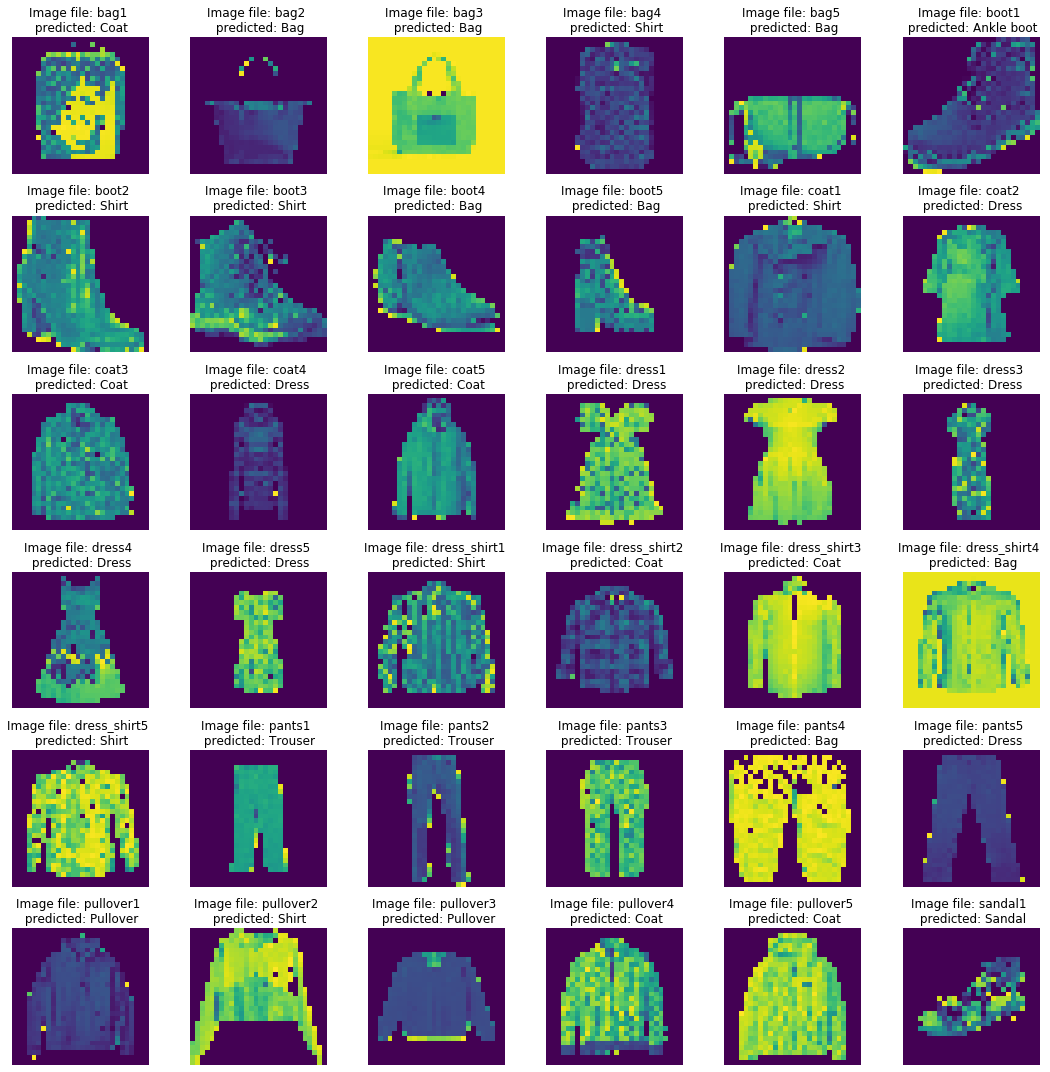

In [42]:
import matplotlib.gridspec as gridspec
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images2 = model2.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0

for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    #ax[i,k].add_subplot(gs[i,k])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images2[pic])]}')
    pic +=1 
plt.tight_layout()
plt.show()

In [39]:
true_pred = 0
for i,img in enumerate(predicted_images2):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images2))*100,2)} of the real pictures are predicted correctly.')
    

32.0 of the real pictures are predicted correctly.


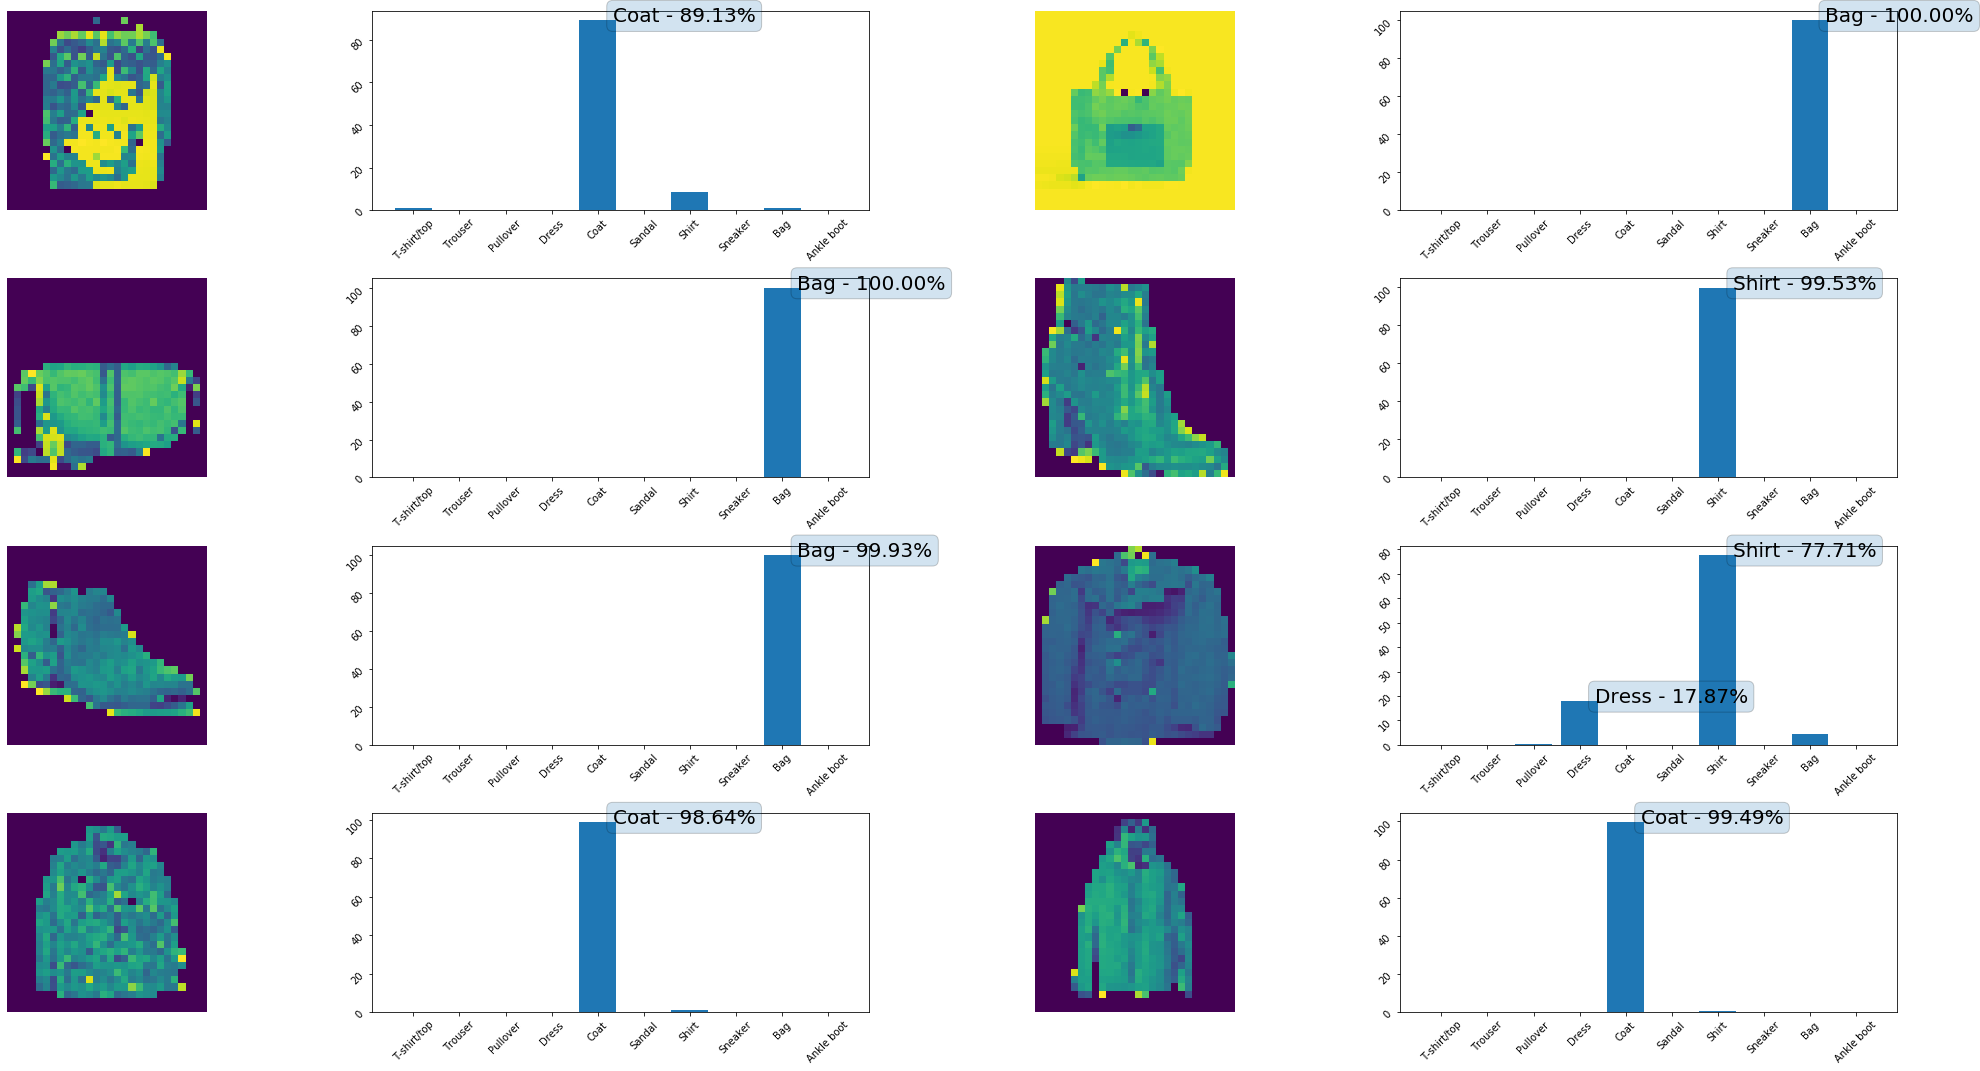

In [40]:
pic = 0
fig, ax = plt.subplots(4,4, figsize =(30,15))
for i in range(4):
  for k in range(4):
    if k % 2 == 0:
      ax[i,k].imshow(images[pic])
      ax[i,k].axis('off')
      ax[i,k].grid(False)
    elif k % 2 == 1:
      ax[i,k].bar(class_names, predicted_images2[pic-1]* 100 )
      ax[i,k].tick_params(rotation =45)
      for a,p in enumerate(ax[i,k].patches):

        if p.get_height() > 12:
            
            ax[i,k].annotate(f"{class_names[a]} - "+format( p.get_height(),'.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), bbox=dict(boxstyle="round", alpha=0.2),size = 20, ha = 'left', va = 'bottom', xytext = (15,-5), textcoords = 'offset points')
    pic +=1
    
plt.tight_layout()

In [60]:
model.save("EPOCH60.h5")